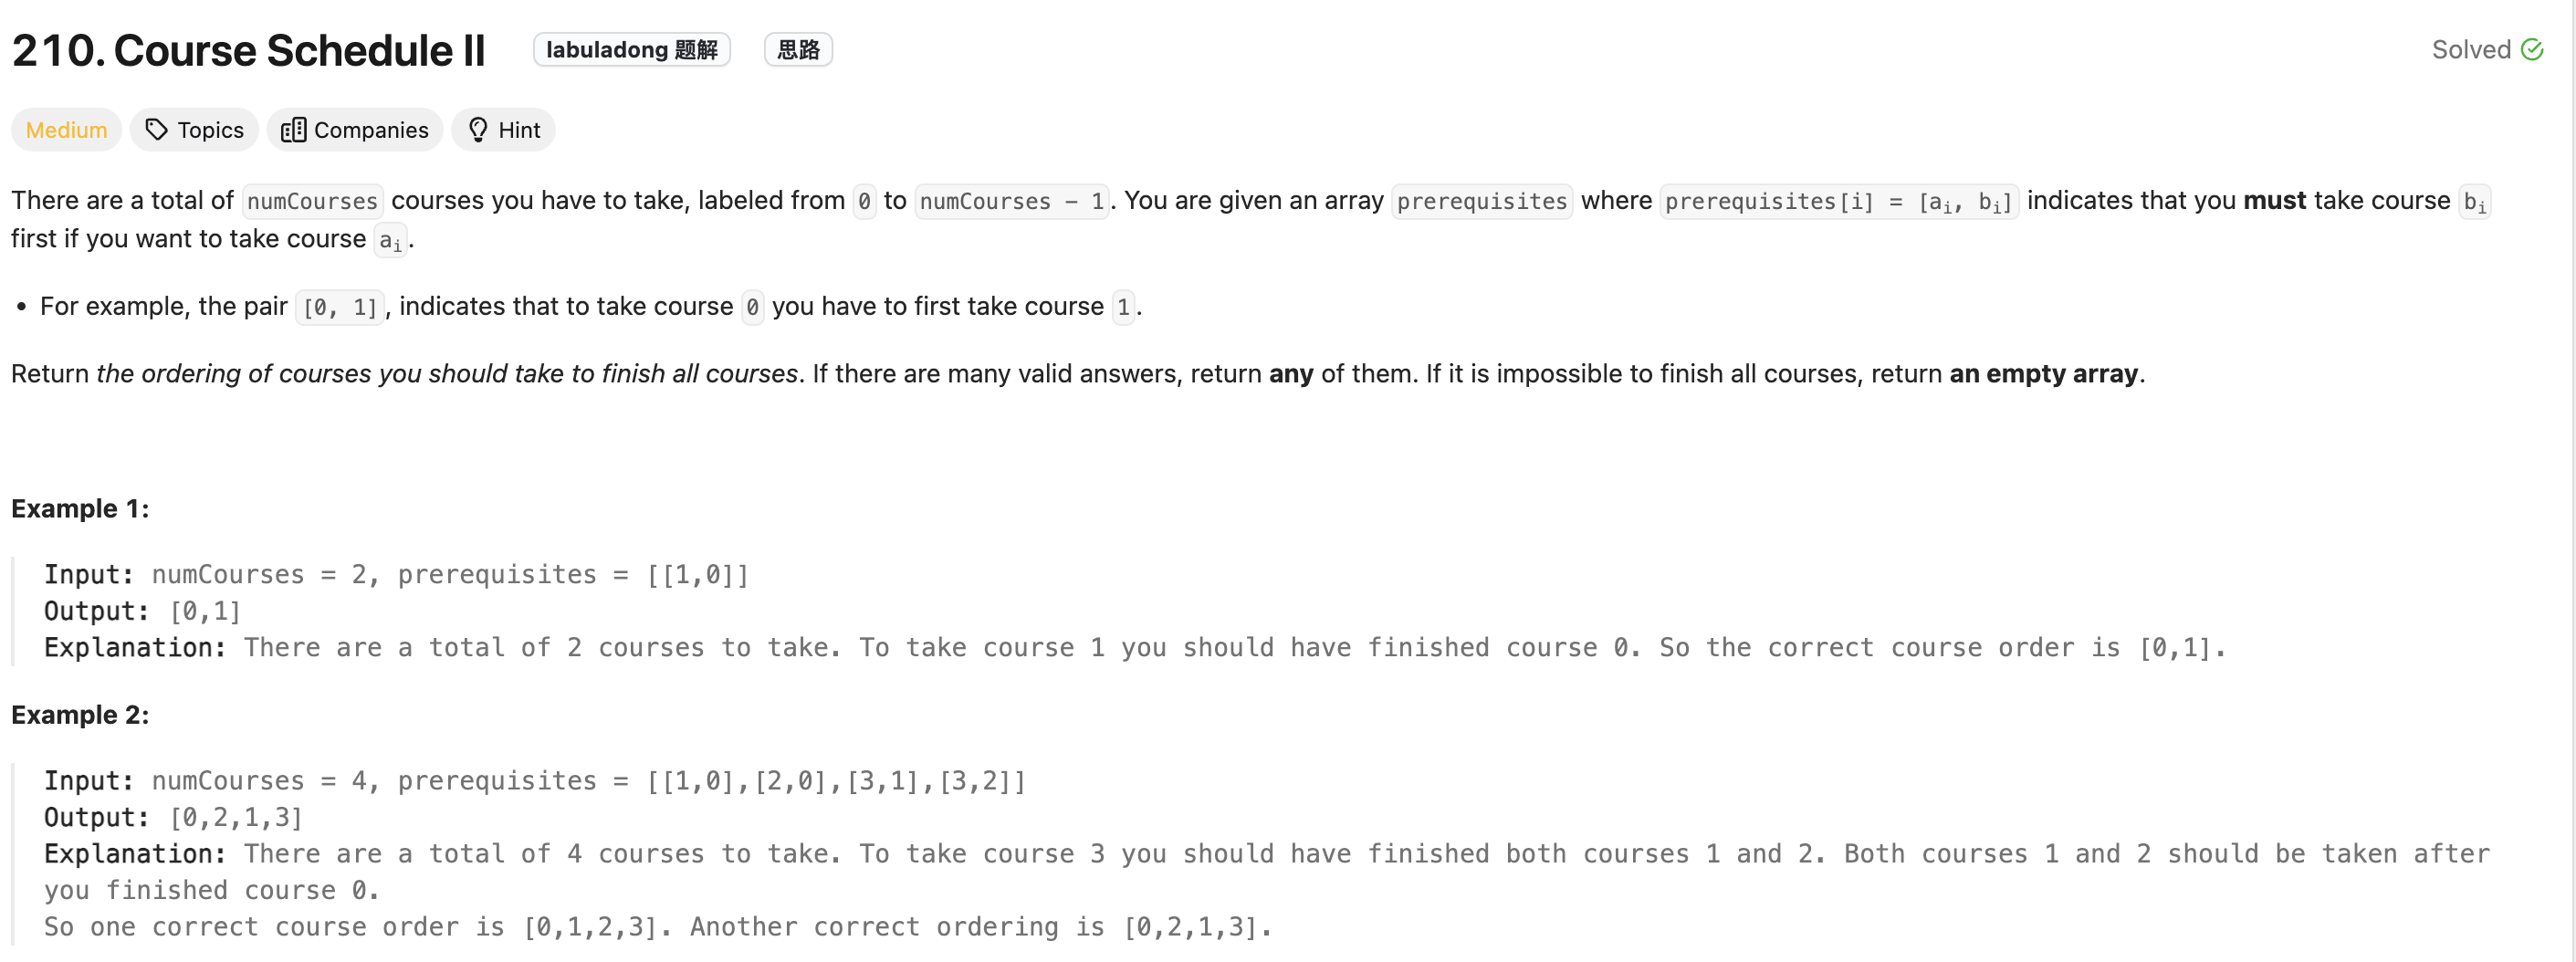

## DFS Solution

In [ ]:
class Solution:

    def __init__(self):
        self.postorder = []
        self.onPath = []
        self.visited = []
        self.hasCycle = False
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        self.visited = [False] * numCourses
        self.onPath = [False] * numCourses

        adj_list = self.build_adj_list(numCourses, prerequisites)
        for i in range(numCourses):
            self.traverse(adj_list, i)
        if self.hasCycle:
            return []
        else:
            return self.postorder
        

    def build_adj_list(self, numCourses: int, prerequisites: List[List[int]]) -> List[List[int]]:
        #build adjacency list
        #graph[course_index] = [prerequisites]
        #course_index range from 0-numCourses
        adj_list = [[] for _ in range(numCourses)]
        for val in prerequisites:
            course, requirement = val
            adj_list[course].append(requirement)
        return adj_list
    
    def traverse(self, graph: List[List[int]], start: index):
        if self.onPath[start]:
            self.hasCycle = True
            return
        if self.visited[start]:
            return
        if self.hasCycle:
            return
        
        self.onPath[start] = True
        for neighbor in graph[start]:
            self.traverse(graph, neighbor)
        self.postorder.append(start)
        self.onPath[start] = False
        self.visited[start] = True

## BFS Solution

In [ ]:
import collections
from typing import List

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        # Step 1: Build the adjacency list representation of the graph
        adj_list = self.build_adj_list(numCourses, prerequisites)

        # Step 2: Initialize an array to track the in-degree of each node (course)
        # in-degree = number of prerequisites for each course
        indegree = [0 for _ in range(numCourses)]
        
        # Calculate in-degree for each course
        for val in prerequisites:
            course, requirement = val
            indegree[course] += 1

        # Step 3: Initialize a queue with all nodes that have zero in-degree
        # These are courses with no prerequisites that can be taken immediately
        q = collections.deque()
        for i in range(numCourses):
            if indegree[i] == 0:
                q.append(i)

        # Step 4: Perform topological sorting
        count = 0              # Count of courses processed
        topo_result = []       # List to store the topological order of courses

        while q:
            # Remove a course with zero in-degree from the queue
            cur = q.popleft()

            # Add the course to the result list
            topo_result.append(cur)
            count += 1  # Mark this course as completed

            # Get all courses that depend on the current course
            unlocked_courses = adj_list[cur]

            # Reduce the in-degree of each dependent course by 1
            for course in unlocked_courses:
                indegree[course] -= 1

                # If a course's in-degree becomes zero, add it to the queue
                if indegree[course] == 0:
                    q.append(course)

        # Step 5: Check if all courses have been processed
        if count == numCourses:
            return topo_result  # Successfully found a valid order
        else:
            return []  # If not all courses were processed, there is a cycle

    # Helper function to build the adjacency list representation of the graph
    def build_adj_list(self, numCourses: int, prerequisites: List[List[int]]) -> List[List[int]]:
        # Initialize an empty adjacency list for each course
        adj_list = [[] for _ in range(numCourses)]

        # Fill the adjacency list with the prerequisites data
        # Each prerequisite pair [course, requirement] means "requirement" must be completed before "course"
        for val in prerequisites:
            course, requirement = val
            adj_list[requirement].append(course)  # Add course to the neighbors of the requirement

        return adj_list
